# 📖 파이썬 클래스(Class) 실습: MRI 코일 압축

이 노트북의 목표는 실제와 유사한 MRI 데이터 처리 과정에 **파이썬 클래스**를 적용해보는 것입니다. `GCCCompressor`라는 클래스를 사용하여 MRI 코일 데이터를 압축하고, 그 결과를 이미지로 재구성하여 시각화하는 전체 과정을 단계별로 실습합니다.

### 학습 목표
1.  클래스가 왜 필요한지 이해합니다.
2.  클래스의 인스턴스를 생성(`__init__`)하고, 메소드를 호출하는 방법을 익힙니다.
3.  복잡한 데이터 처리 파이프라인(압축 → 재구성 → 시각화)을 구성하는 방법을 배웁니다.

---

## 1: 라이브러리 임포트
먼저, 데이터 처리와 시각화에 필요한 라이브러리들을 불러옵니다.

In [4]:
import numpy as np
import numpy.fft as fft
import h5py
import os
from tqdm.notebook import tqdm  # 주피터 노트북에서는 tqdm.notebook을 사용하는 것이 좋습니다.
import matplotlib.pyplot as plt

import sys
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if project_root not in sys.path:
    sys.path.append(project_root)

from utils.data.transforms import GCCCompressor

# 시각화 스타일 설정
plt.style.use('dark_background')

## 2: 경로 및 하이퍼파라미터 설정

데이터를 읽고 저장할 경로와, 압축 과정에 사용될 여러 파라미터(설정값)들을 미리 변수로 정의합니다. 이렇게 하면 나중에 설정을 변경하기가 매우 편리합니다.

In [7]:
# --- 디렉토리 경로 설정 ---
# 이 노트북 파일이 있는 위치에 data 폴더를 만들어 사용합니다.
INPUT_DIR = '/Users/sinjeongmin/Desktop/25-3/박상원/data1/val/kspace1'
COMPRESSED_DIR = '/Users/sinjeongmin/Desktop/25-3/박상원/data1/val/kspace_compressed'
RECON_DIR = '/Users/sinjeongmin/Desktop/25-3/박상원/data1/val/kspace_reconstructed'

# 폴더가 없으면 자동으로 생성합니다.
os.makedirs(INPUT_DIR, exist_ok=True)
os.makedirs(COMPRESSED_DIR, exist_ok=True)
os.makedirs(RECON_DIR, exist_ok=True)

# --- HDF5 파일 내 데이터셋 이름 ---
KSPACE_DATASET_NAME = 'kspace'

# --- 압축 관련 하이퍼파라미터 ---
TARGET_COILS = 4       # 압축 후 목표 가상 코일 수 (값을 바꿔보세요!)
NUM_CALIB_LINES = 24   # k-space 중앙에서 사용할 보정 데이터 라인 수
SLIDING_WINDOW_SIZE = 5 # 압축 행렬 계산 시 사용할 슬라이딩 윈도우 크기

## 5: 클래스 인스턴스 생성 및 압축 실행

이제 `GCCCompressor` 설계도를 바탕으로 실제 압축기 객체(인스턴스)를 만들어 보겠습니다. `__init__` 메소드에 정의된 파라미터들을 전달하여 우리가 원하는 방식으로 작동하는 압축기를 생성할 수 있습니다.

In [8]:
# 1. GCCCompressor 클래스의 인스턴스를 생성합니다.
#    앞서 설정한 하이퍼파라미터들을 전달합니다.
compressor = GCCCompressor(
    target_coils=TARGET_COILS,
    num_calib_lines=NUM_CALIB_LINES,
    sliding_window_size=SLIDING_WINDOW_SIZE,
    kspace_dataset_name=KSPACE_DATASET_NAME
)

# 2. 생성된 compressor 객체의 run 메소드를 호출하여 압축을 실행합니다.
compressor.run(INPUT_DIR, COMPRESSED_DIR)

GCC Compressor가 다음 파라미터로 초기화되었습니다:
- Target Coils: 4
- Calibration Lines: 24
- Sliding Window Size: 5
총 1개의 파일에 대해 압축을 시작합니다...


Total Progress:   0%|          | 0/1 [00:00<?, ?it/s]

























Total Progress: 100%|##########| 1/1 [00:02<00:00,  2.61s/it]


모든 파일 처리가 완료되었습니다.
결과는 '/Users/sinjeongmin/Desktop/25-3/박상원/data1/val/kspace_compressed' 디렉토리에 저장되었습니다.


## 6: 이미지 재구성 및 시각화

압축된 k-space 데이터는 아직 이미지가 아닙니다. 이를 사람이 볼 수 있는 이미지로 변환하는 재구성 과정이 필요합니다. 여기서는 각 가상 코일의 이미지를 만들어 **RSS(Root-Sum-of-Squares)** 방식으로 결합합니다.

결과 시각화를 통해 **Aligned**와 **Unaligned** 압축의 차이를 직접 확인해 보겠습니다.


시각화를 위해 'knee_acc8_100_gcc_hybrid.h5' 파일을 로드합니다.


/opt/anaconda3/envs/fmri/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50517 (\N{HANGUL SYLLABLE AB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/fmri/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/fmri/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/fmri/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/fmri/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from

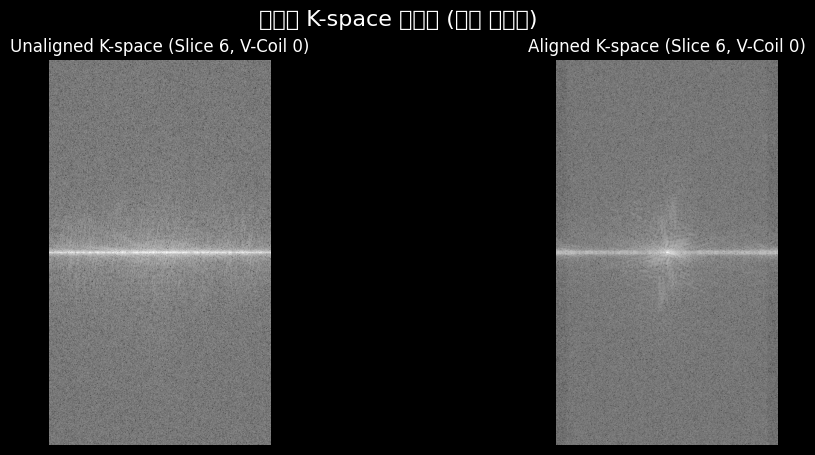


재구성을 시작합니다...
재구성된 이미지를 '/Users/sinjeongmin/Desktop/25-3/박상원/data1/val/kspace_reconstructed/knee_acc8_100_gcc_hybrid.h5'에 저장했습니다.


/opt/anaconda3/envs/fmri/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/fmri/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/fmri/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/fmri/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/fmri/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from 

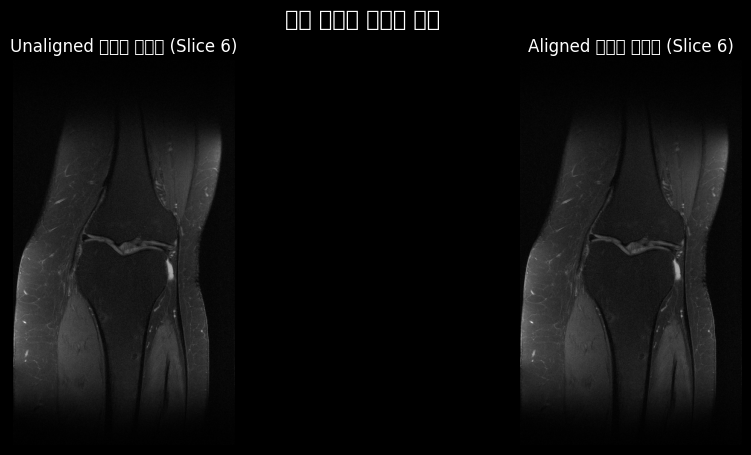

In [9]:
def rss_combine(coil_images):
    """코일 이미지들을 Root-Sum-of-Squares 방식으로 결합합니다."""
    return np.sqrt(np.sum(np.abs(coil_images)**2, axis=0))

def reconstruct_from_kspace(kspace_4d):
    """4D K-space 데이터를 3D 이미지 데이터로 변환합니다."""
    n_slices, n_coils, n_pe, n_ro = kspace_4d.shape
    reconstructed_images_3d = np.zeros((n_slices, n_pe, n_ro), dtype=np.float32)
    
    for s_idx in range(n_slices):
        slice_kspace = kspace_4d[s_idx]
        coil_images = np.zeros_like(slice_kspace, dtype=np.complex128)
        for c_idx in range(n_coils):
            ifftshifted_kspace = fft.ifftshift(slice_kspace[c_idx])
            image_domain = fft.ifft2(ifftshifted_kspace)
            centered_image = fft.fftshift(image_domain)
            coil_images[c_idx] = centered_image
        reconstructed_images_3d[s_idx] = rss_combine(coil_images)
        
    return reconstructed_images_3d

def visualization_worker(compressed_dir, recon_dir):
    """압축된 파일들을 재구성하고 시각화하는 전체 과정을 담당합니다."""
    file_list = sorted([f for f in os.listdir(compressed_dir) if f.endswith('.h5')])
    if not file_list:
        print(f"'{compressed_dir}'에 압축된 파일이 없습니다.")
        return
    
    # 첫 번째 파일만 시각화 대상으로 선택
    filename = file_list[0]
    compressed_path = os.path.join(compressed_dir, filename)
    recon_path = os.path.join(recon_dir, filename.replace('_compressed.h5', '_recon.h5'))

    with h5py.File(compressed_path, 'r') as f_in:
        print(f"\n시각화를 위해 '{filename}' 파일을 로드합니다.")
        kspace_aligned = f_in['kspace_aligned_gcc'][()]
        kspace_unaligned = f_in['kspace_gcc_unaligned'][()]

        # --- k-space 시각화 ---
        # 중앙 슬라이스, 첫 번째 가상 코일 선택
        slice_to_show = kspace_aligned.shape[0] // 2
        coil_to_show = 0
        
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(np.log(np.abs(kspace_unaligned[slice_to_show, coil_to_show]) + 1e-9), cmap='gray')
        plt.title(f'Unaligned K-space (Slice {slice_to_show}, V-Coil {coil_to_show})')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(np.log(np.abs(kspace_aligned[slice_to_show, coil_to_show]) + 1e-9), cmap='gray')
        plt.title(f'Aligned K-space (Slice {slice_to_show}, V-Coil {coil_to_show})')
        plt.axis('off')
        plt.suptitle('압축된 K-space 시각화 (로그 스케일)', fontsize=16)
        plt.show()
        
        # --- 이미지 재구성 및 저장 ---
        print("\n재구성을 시작합니다...")
        recon_aligned = reconstruct_from_kspace(kspace_aligned)
        recon_unaligned = reconstruct_from_kspace(kspace_unaligned)
        
        with h5py.File(recon_path, 'w') as f_out:
            f_out.create_dataset('reconstruction_aligned', data=recon_aligned)
            f_out.create_dataset('reconstruction_unaligned', data=recon_unaligned)
        print(f"재구성된 이미지를 '{recon_path}'에 저장했습니다.")

        # --- 재구성 이미지 시각화 ---
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(recon_unaligned[slice_to_show], cmap='gray')
        plt.title(f'Unaligned 재구성 이미지 (Slice {slice_to_show})')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(recon_aligned[slice_to_show], cmap='gray')
        plt.title(f'Aligned 재구성 이미지 (Slice {slice_to_show})')
        plt.axis('off')
        plt.suptitle('최종 재구성 이미지 비교', fontsize=16)
        plt.show()

# 시각화 실행
visualization_worker(COMPRESSED_DIR, RECON_DIR)

## 결론 및 추가 실습

축하합니다! 여러분은 `GCCCompressor` 클래스를 성공적으로 사용하여 MRI 데이터를 압축하고, 그 결과를 이미지로 재구성 및 시각화하는 전체 과정을 완료했습니다.

### 무엇을 배웠나요?
- **클래스 인스턴스화**: `compressor = GCCCompressor(...)` 코드를 통해 클래스 설계도로부터 실제 객체를 만드는 방법을 배웠습니다.
- **메소드 호출**: `compressor.run()` 코드를 통해 객체가 가진 기능을 실행하는 방법을 배웠습니다.
- **파라미터의 중요성**: `__init__`에 전달하는 파라미터를 바꾸면 객체의 행동을 제어할 수 있다는 것을 알게 되었습니다.

### 다음 단계
이제 여러분이 직접 코드를 수정하며 실험해볼 차례입니다.

1.  **하이퍼파라미터 변경**: `ขั้นตอนที่ 2` 셀에서 `TARGET_COILS` 값을 `2`나 `1`로 바꿔보세요. 압축률이 높아지면 이미지 품질이 어떻게 변하는지 관찰해보세요.
2.  **다른 슬라이스 시각화**: `ขั้นตอนที่ 6`의 `visualization_worker` 함수에서 `slice_to_show` 값을 `0`이나 `2`로 바꿔서 다른 슬라이스의 결과를 확인해보세요.